In [92]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('data.csv')
df.dropna()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


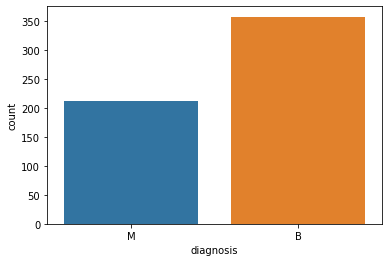

In [94]:
sns.countplot(df.diagnosis, label="count")

In [95]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [97]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [98]:
y = y.reshape(-1, 1)

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
le = LabelEncoder()
y_train = le.fit_transform(y_train)
x_train = sc.fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
y_test = le.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

# Fitting the Model

In [103]:
def models(X_train, Y_train):

    # Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    # Using KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, Y_train)

    # Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)

    # Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)

    # Using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    # Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)

    # Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(
        n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)

    # print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:',
          log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:',
          knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:',
          svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:',
          svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:',
          gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:',
          tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:',
          forest.score(X_train, Y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [104]:
model = models(x_train, y_train)

[0]Logistic Regression Training Accuracy: 0.9868131868131869
[1]K Nearest Neighbor Training Accuracy: 0.9824175824175824
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.989010989010989
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.989010989010989
[4]Gaussian Naive Bayes Training Accuracy: 0.9340659340659341
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9978021978021978


In [105]:
from sklearn.model_selection import cross_val_score

def scores(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log_scores =  cross_val_score(log, X_train, y_train, cv=10)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn_scores = cross_val_score(knn, X_train, y_train, cv=10)


    from sklearn.svm import SVC
    svm_lin = SVC(kernel="linear")
    svm_lin_scores = cross_val_score(svm_lin, X_train, y_train, cv=10)

    from sklearn.svm import SVC
    svm_rbf = SVC(kernel='rbf')
    svm_rbf_scores = cross_val_score(svm_rbf, X_train, y_train, cv=10)

    from sklearn.naive_bayes import GaussianNB
    gauss = KNeighborsClassifier()
    gauss_scores = cross_val_score(gauss, X_train, y_train, cv=10)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree_scores = cross_val_score(tree, X_train, y_train, cv=10)

    from sklearn.ensemble import RandomForestClassifier
    forest= RandomForestClassifier()
    forest_scores = cross_val_score(forest, X_train, y_train, cv=10)

    print('[0]Logistic Regression Training Scores:', log_scores.mean())
    print('[1]K Nearest Neighbor Training Scores:', knn_scores.mean())
    print('[2]Support Vector Machine (Linear Classifier) Training Scores:', svm_lin_scores.mean())
    print('[3]Support Vector Machine (RBF Classifier) Training Scores:', svm_rbf_scores.mean())
    print('[4]Gaussian Naive Bayes Training Scores:', gauss_scores.mean())
    print('[5]Decision Tree Classifier Training Scores:', tree_scores.mean())
    print('[6]Random Forest Classifier Training Scores:', forest_scores.mean())
  
    return log_scores, knn_scores, svm_lin_scores, svm_rbf_scores, gauss_scores, tree_scores, forest_scores


In [106]:
score = scores(x_train, y_train)

[0]Logistic Regression Training Scores: 0.9735748792270531
[1]K Nearest Neighbor Training Scores: 0.9669565217391305
[2]Support Vector Machine (Linear Classifier) Training Scores: 0.9670048309178745
[3]Support Vector Machine (RBF Classifier) Training Scores: 0.971400966183575
[4]Gaussian Naive Bayes Training Scores: 0.9669565217391305
[5]Decision Tree Classifier Training Scores: 0.9231400966183575
[6]Random Forest Classifier Training Scores: 0.96487922705314


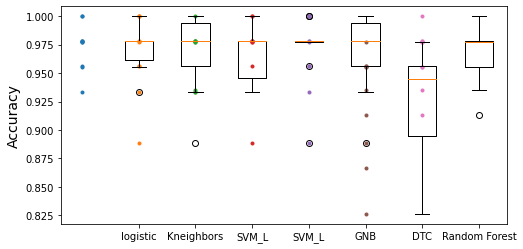

In [107]:
plt.figure(figsize=(8, 4))
plt.plot([0]*10, score[0], ".")
plt.plot([1]*10, score[1], ".")
plt.plot([2]*10, score[2], ".")
plt.plot([3]*10, score[3], ".")
plt.plot([4]*10, score[4], ".")
plt.plot([5]*10, score[5], ".")
plt.plot([6]*10, score[6], ".")
plt.boxplot([score[0], score[1], score[2],score[3],score[4],score[5],score[6]], labels=("logistic", "Kneighbors","SVM_L","SVM_L","GNB","DTC","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

# Confussion Metrics

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model[0].predict(x_test))

print(cm)

for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(x_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()

[[ 0 71]
 [ 0 43]]
[[ 0 71]
 [ 0 43]]
Model[0] Testing Accuracy = "0.37719298245614036!"

[[ 0 71]
 [ 0 43]]
Model[1] Testing Accuracy = "0.37719298245614036!"

[[ 0 71]
 [ 0 43]]
Model[2] Testing Accuracy = "0.37719298245614036!"

[[ 0 71]
 [ 0 43]]
Model[3] Testing Accuracy = "0.37719298245614036!"

[[ 0 71]
 [ 0 43]]
Model[4] Testing Accuracy = "0.37719298245614036!"

[[71  0]
 [16 27]]
Model[5] Testing Accuracy = "0.8596491228070176!"

[[ 0 71]
 [ 0 43]]
Model[6] Testing Accuracy = "0.37719298245614036!"



# Accuracy Scores

In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(x_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(y_test, model[i].predict(x_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.38      1.00      0.55        43

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114

0.37719298245614036

Model  1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.38      1.00      0.55        43

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114

0.37719298245614036

Model  2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.38      1.00      0.55        43

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weigh

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [110]:
y_pred = model[5].predict(x_test)

# Creating Dataframes for Viewing results

Aligning the test

In [111]:
y_pred1 = y_pred.reshape(-1, 1)
y_test1 = y_test.reshape(-1, 1)

In [112]:
# Putting the predicted and test in the same numpy array
Collection = np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1)
View = pd.DataFrame(Collection, columns=["Predicted", "Actual"])
View

,Predicted,Actual
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
109,0,0
110,0,1
111,0,0
112,0,0


# Actual Values

In [113]:
## With Actual Values 

Test1 = le.inverse_transform(y_pred1)
Test2 = le.inverse_transform(y_test1)
Collection2 = np.concatenate((Test1.reshape(len(Test1),1), Test2.reshape(len(Test2),1)),1)
View2 = pd.DataFrame(Collection2, columns=["Predicted", "Actual"])
View2

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Predicted,Actual
0,B,B
1,M,M
2,M,M
3,B,B
4,B,B
...,...,...
109,B,B
110,B,M
111,B,B
112,B,B


In [114]:
sm2 = confusion_matrix(y_test, y_pred)
sm2

array([[71,  0],
       [16, 27]])

# Cumulative Frequency  Curve 

In [118]:
total =  len(y_test)
count_1 = np.sum(y_test)
count_0 = total - count_1
plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [123]:
probs = dtc.predict_proba(x_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

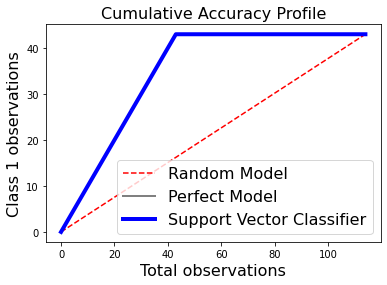

In [125]:
plt.plot([0, total], [0, count_1], c = 'r', linestyle = '--', label = 'Random Model')

plt.plot([0, count_1, total], 
         [0, count_1, count_1], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Support Vector Classifier', 
         linewidth = 4)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

# Finished